In [15]:
import math
import pandas_datareader as data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2022-09-07 22:56:28.084160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-07 22:56:35.746330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 22:56:35.746400: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-07 22:56:36.167198: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-07 22:56:40.582802: W tensorflow/stream_executor/platform/de

In [11]:
# Get the Stock quote
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01' , end='2022-08-08')

# Show the data
df

High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2022-08-02  162.410004  159.630005  160.100006  160.009995   59907000.0   
2022-08-03  166.589996  160.750000  160.839996  166.130005   82507500.0   
2022-08-04  167.190002  164.429993  166.009995  165.809998   55474100.0   
2022-08-05  165.850006  163.000000  163.210007  165.350006   56697000.0   
2022-08-08  167.809998  164.199997  166.369995  164.869995   60276900.0   

             Adj Close  
Date                    
2012-01-03   12.540048  
2012-01-04   12.607440  
2012-01-05   12.747406  
2012-01-06   12.880663  
2012-01-09   12.860232  
...                ...  
2022-08-02  159.788040  
2022-08-03  165.899567  
2022-08-04  165.580002  
2022-08-05  165.350006  
2022-08-08  164.869995  

[2667 rows x 6 columns]

In [13]:
df.shape

(2667, 6)

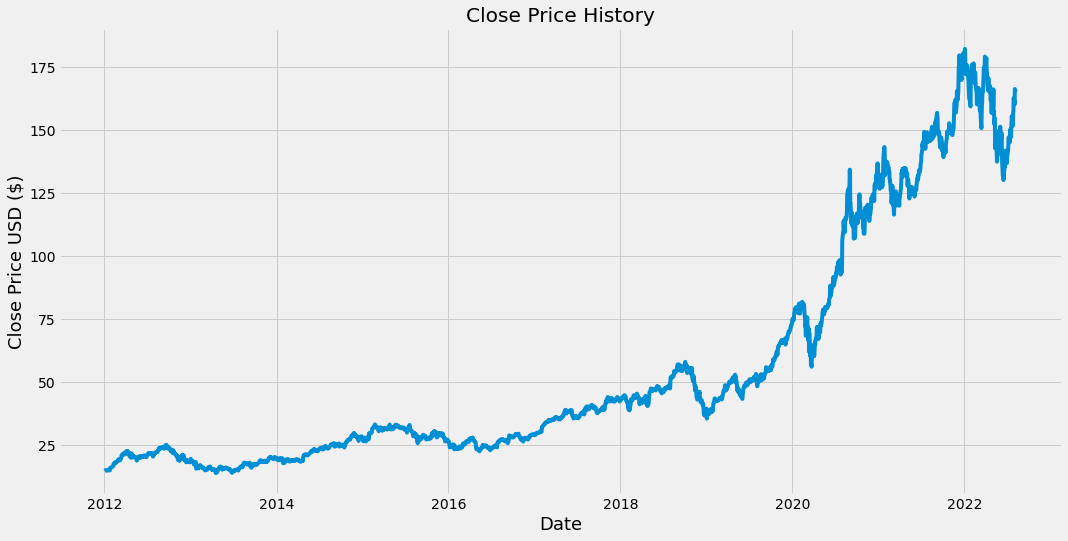

In [18]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [30]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values


# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*.8)

training_data_len
# dataset

2134

In [39]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.9036073 ],
       [0.90087028],
       [0.89801413]])

In [45]:
#Create training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [47]:
# Convert the x_train and y_train to numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)

In [50]:
# Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(2074, 60, 1)

In [55]:
# Build the LSTM Model 
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [57]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [58]:
# Train the model
model.fit(x_train, y_train , batch_size=1 , epochs=1)

2074/2074 [==============================] - 291s 136ms/step - loss: 3.7292e-04


In [60]:
# Create the testing data set
# Create a new array containing scaled values from index 2074 to 2534
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [61]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [62]:
# Reshape the data
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] , 1))

In [64]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 66ms/step


In [76]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( (predictions - y_test)**2))
rmse

7.3836351346019296

/tmp/ipykernel_17652/1672128348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


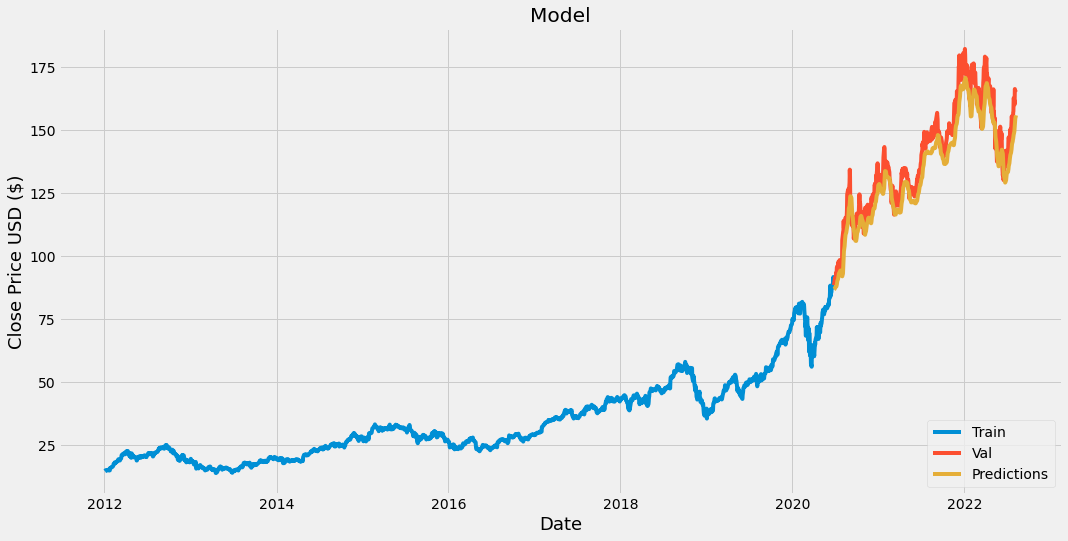

In [77]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [78]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2020-06-26   88.407501    86.726913
2020-06-29   90.445000    86.969574
2020-06-30   91.199997    87.196617
2020-07-01   91.027496    87.457474
2020-07-02   91.027496    87.693794
...                ...          ...
2022-08-02  160.009995   150.604889
2022-08-03  166.130005   151.649643
2022-08-04  165.809998   153.081650
2022-08-05  165.350006   154.496109
2022-08-08  164.869995   155.707596

[533 rows x 2 columns]

In [79]:
# Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2022-08-08')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-2074:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 1s 996ms/step
[[156.62692]]


In [80]:
# Get the quote
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2022-08-09',end='2022-08-09')
print(apple_quote2['Close'])

Date
2022-08-08    164.869995
2022-08-09    164.919998
Name: Close, dtype: float64
